In [1]:
import bs4
from urllib.request import urlopen as urll
from bs4 import BeautifulSoup as soup
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import datetime # сейчас я пасрю с 1 странице поиска, можно забить юрл, чтобы понимать , где это находит
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime
from numpy import mean
import numpy as np
pd.set_option("display.max_rows", 1000)
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_excel("BigTable8430rows.xlsx")

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Готовые,Искатели,Репосты_вк,Репосты_одн,Возраст,Рост(Slava),Мед. Состояние,Фото,...,Цвет глаз,Url,Место,Одежда(яркая),Одежда(подробность),Приметы(кол-во),Время поиска,Время пропажи,Время нахождения,Координаты пропажи
0,0,0,2,0,0,0,Коля объебался,Er,здоров,отсутствует,...,-,https://lizaalert.org/forum/viewtopic.php?f=191&t=11738&sid=8cd638516661c671de137fe803ebfb19,NaN,Не указано,Не указано,Не указано,NaN,NaN,NaN,no cord
1,1,1,0,2,2,0,47,170,требуется мед. помощь,отсутствует,...,серые,https://lizaalert.org/forum/viewtopic.php?f=191&t=8641&sid=8cd638516661c671de137fe803ebfb19,NaN,Не указано,Не указано,Не указано,NaN,NaN,NaN,23.10 11:30
2,2,2,0,103,64,0,31,160,здоров,отсутствует,...,черная,https://lizaalert.org/forum/viewtopic.php?f=191&t=7047&sid=8cd638516661c671de137fe803ebfb19,NaN,Темная,4,Не указано,NaN,NaN,NaN,no cord
3,3,3,0,1,32,0,Коля объебался,162,здоров,отсутствует,...,голубые,https://lizaalert.org/forum/viewtopic.php?f=191&t=5230&sid=8cd638516661c671de137fe803ebfb19,NaN,Не указано,Не указано,Не указано,NaN,NaN,NaN,no cord
4,4,4,0,61,61,0,Коля объебался,170,здоров,отсутствует,...,зеленые,https://lizaalert.org/forum/viewtopic.php?f=191&t=5316&sid=8cd638516661c671de137fe803ebfb19,NaN,Не указано,Не указано,Не указано,NaN,NaN,NaN,no cord
5,5,5,0,90,30,0,79,162,здоров,присутствует,...,Карие,https://lizaalert.org/forum/viewtopic.php?f=191&t=4784&sid=8cd638516661c671de137fe803ebfb19,NaN,Не указано,3,Не указано,NaN,NaN,NaN,no cord
6,6,6,2,0,0,0,Коля объебался,Er,здоров,отсутствует,...,-,https://lizaalert.org/forum/viewtopic.php?f=211&t=11738&sid=552ee364b9e878f5e466f2868a0cbbd8,NaN,Не указано,Не указано,Не указано,NaN,NaN,NaN,no cord
7,7,7,0,4,0,0,84,175,здоров,присутствует,...,-,https://lizaalert.org/forum/viewtopic.php?f=211&t=21988&sid=552ee364b9e878f5e466f2868a0cbbd8,NaN,Темная,4,2,NaN,NaN,NaN,no cord
8,8,8,0,24,0,0,75,168,здоров,присутствует,...,карие,https://lizaalert.org/forum/viewtopic.php?f=211&t=17000&sid=552ee364b9e878f5e466f2868a0cbbd8,NaN,Темная,4,0,NaN,NaN,NaN,"57.278246, 50.038326"
9,9,9,0,1,0,0,45,165,здоров,присутствует,...,карие,https://lizaalert.org/forum/viewtopic.php?f=211&t=16523&sid=552ee364b9e878f5e466f2868a0cbbd8,NaN,Яркая,3,0,NaN,NaN,NaN,no cord


In [4]:
a = df[df['Возраст'] != "Коля объебался"]
dfnew = a[a['Рост(Slava)'] != "Er"]

In [5]:
plott = dfnew[['Возраст','Рост(Slava)','Репосты_вк','Репосты_одн','Искатели','Готовые']]
plott

,Возраст,Рост(Slava),Репосты_вк,Репосты_одн,Искатели,Готовые
1,47,170,2,0,2,0
2,31,160,64,0,103,0
5,79,162,30,0,90,0
7,84,175,0,0,4,0
8,75,168,0,0,24,0
9,45,165,0,0,1,0
10,52,165,0,0,2,0
11,26,160,17,0,2,0
12,81,155,0,0,1,0
14,68,155,0,0,4,0


In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Рост')

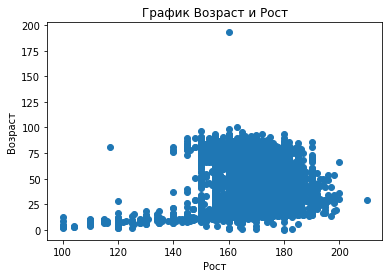

In [114]:
plt.plot(plott['Рост(Slava)'],plott['Возраст'],'o')
plt.title('График Возраст и Рост')
plt.ylabel('Возраст')
plt.xlabel('Рост')

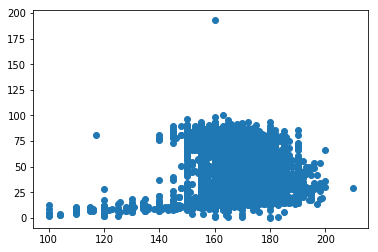

In [94]:
plt.scatter(plott['Рост(Slava)'],plott['Возраст'])

In [152]:
s = list(map(int, list(plott["Возраст"])))


Text(0.5, 0, 'Возраст')

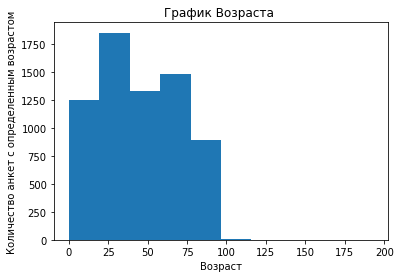

In [154]:
plt.hist(s)
plt.title('График Возраста ')
plt.ylabel('Количество анкет с определенным возрастом')
plt.xlabel('Возраст')

Text(0.5, 0, 'Рост')

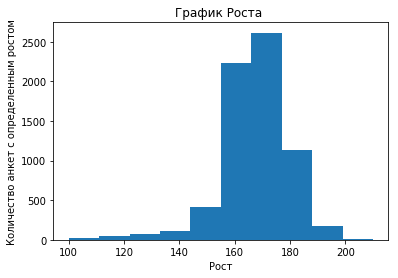

In [156]:
q = list(map(int, list(plott['Рост(Slava)'])))
plt.hist(q)
plt.title('График Роста ')
plt.ylabel('Количество анкет с определенным ростом')
plt.xlabel('Рост')

In [ ]:
pip install plotly

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Surface, Scatter3d
